In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree 
from sklearn import metrics
import joblib
import pickle
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv('Customer Data.csv')

In [83]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [84]:
df.shape

(8950, 18)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [86]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [87]:
df.isnull().values.any()

True

In [88]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [89]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [90]:
df.apply(pd.isnull).sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
df.drop(columns=['CUST_ID'],axis=1,inplace=True)

In [93]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

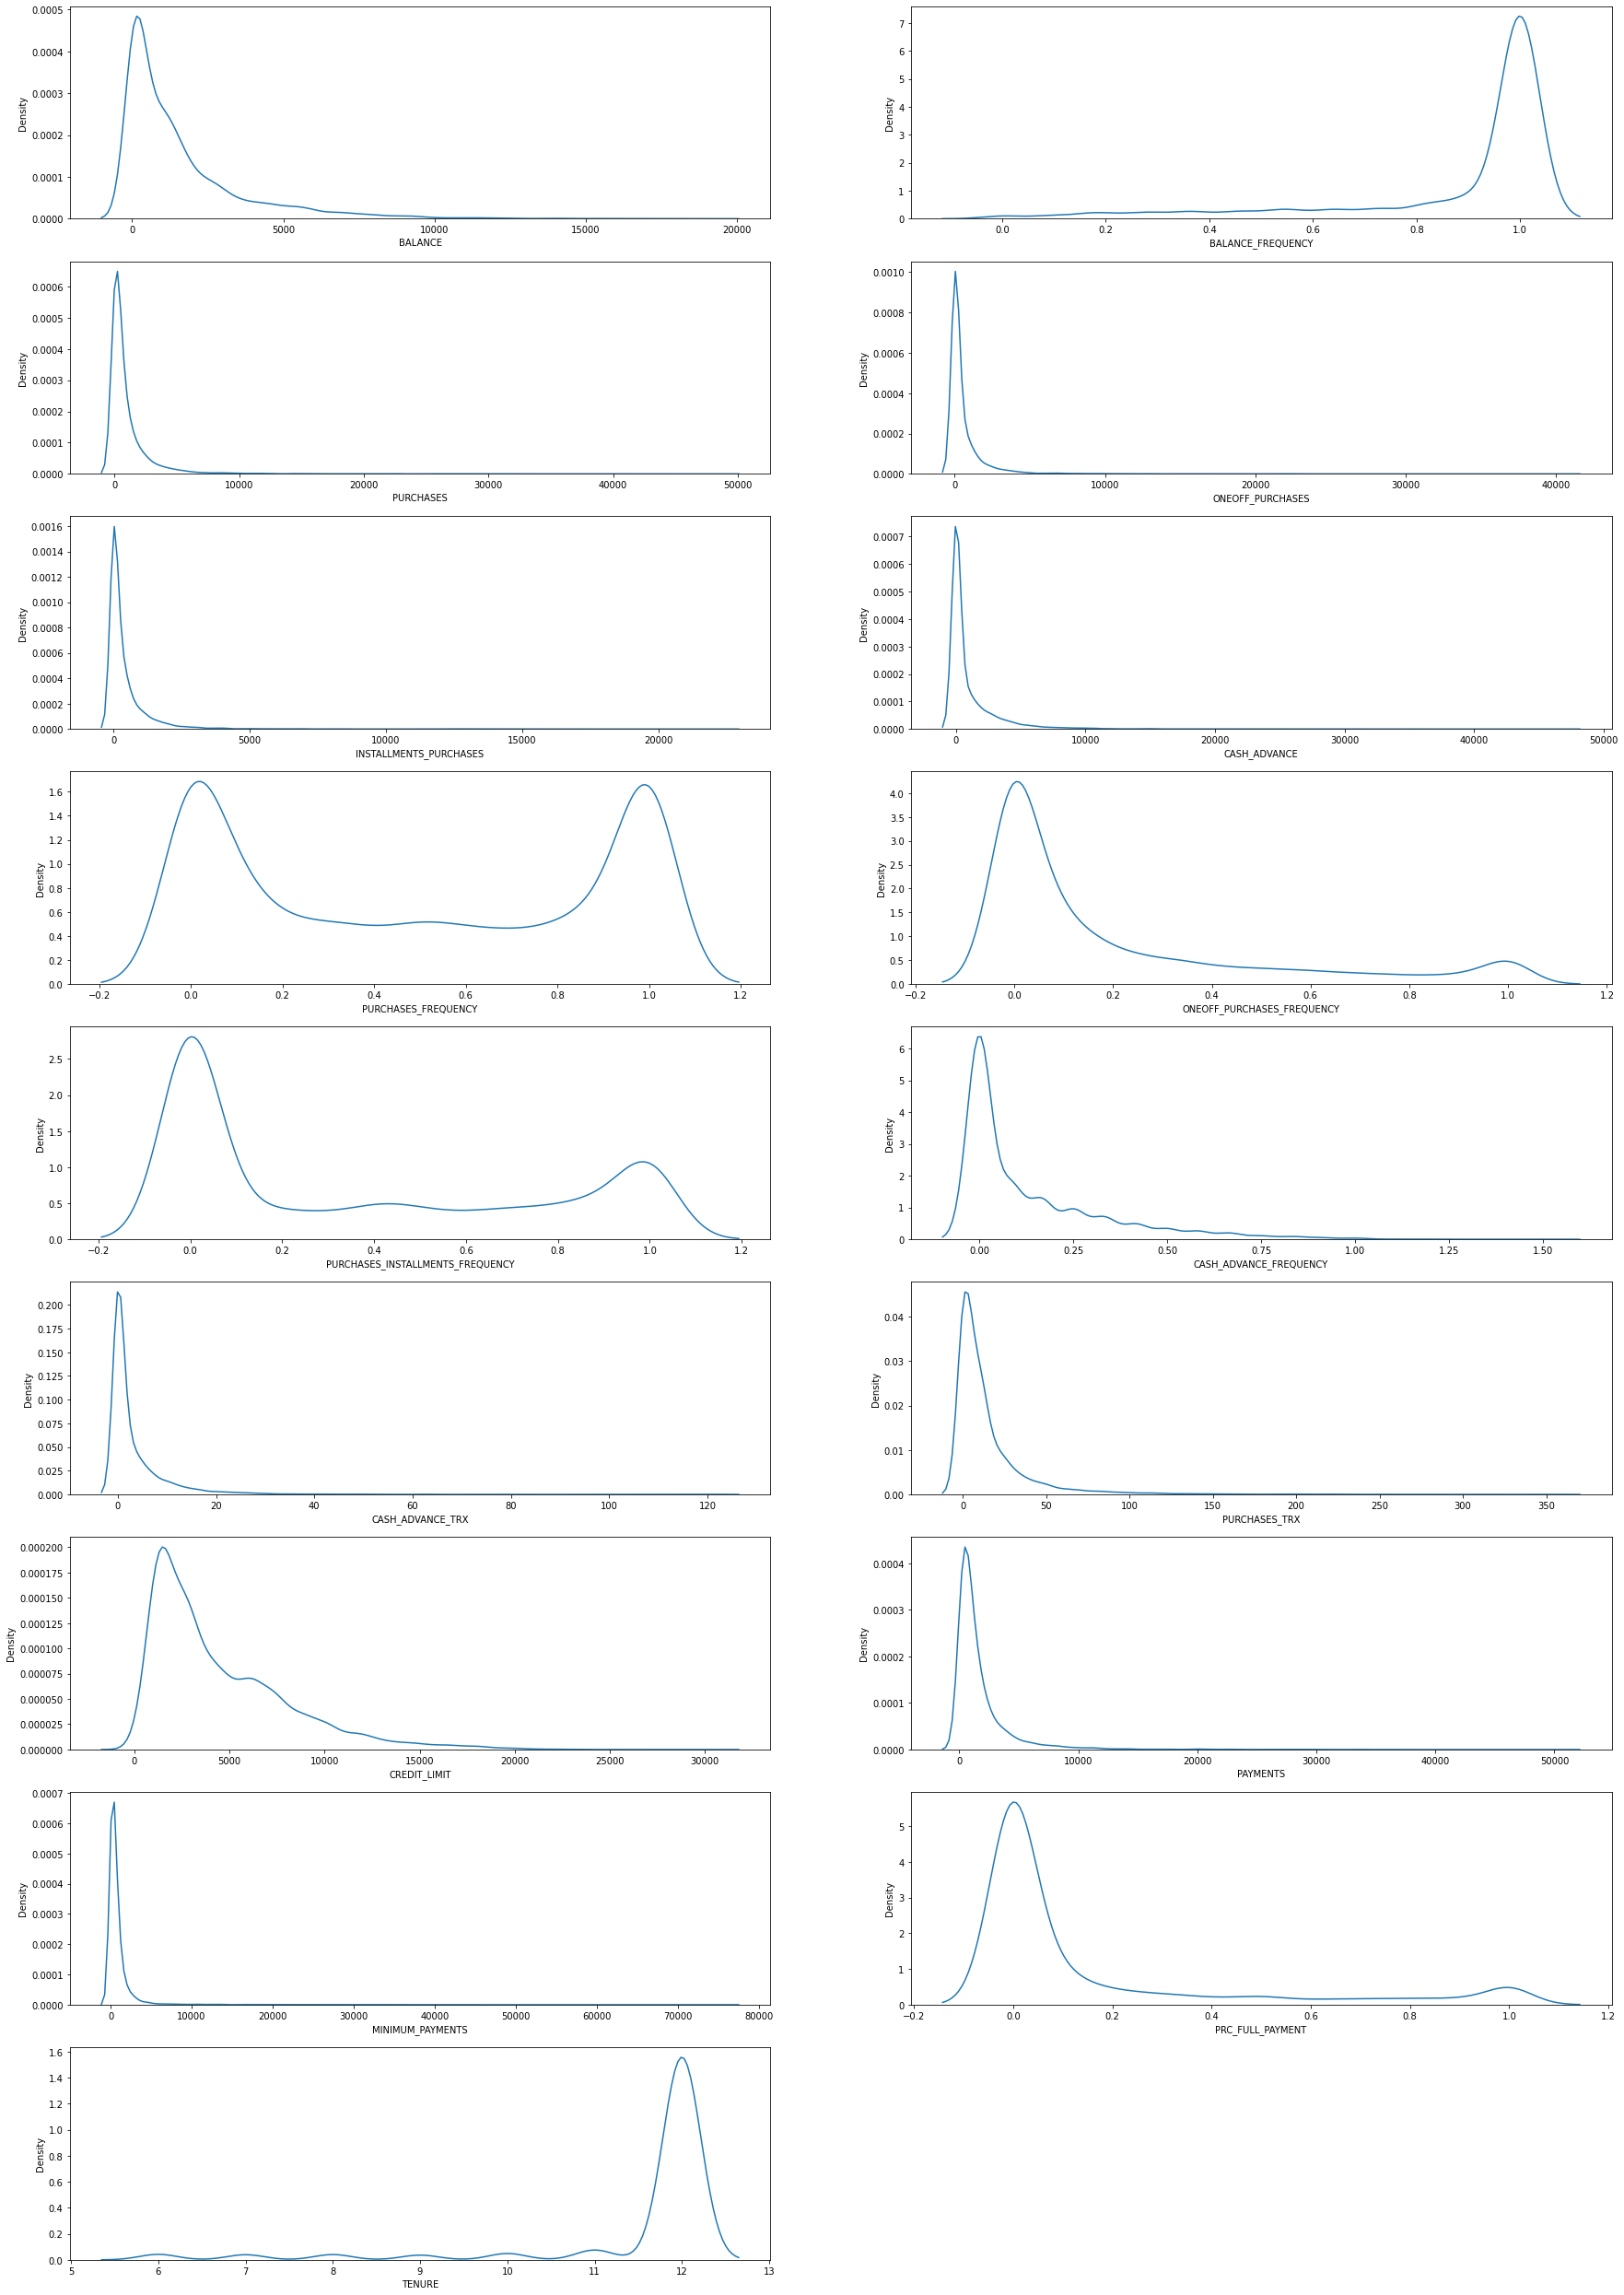

In [94]:
plt.figure(figsize=(30,45))
for i,column in enumerate(df.columns):
    if df[column].dtype!='object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(df[column],ax=ax)

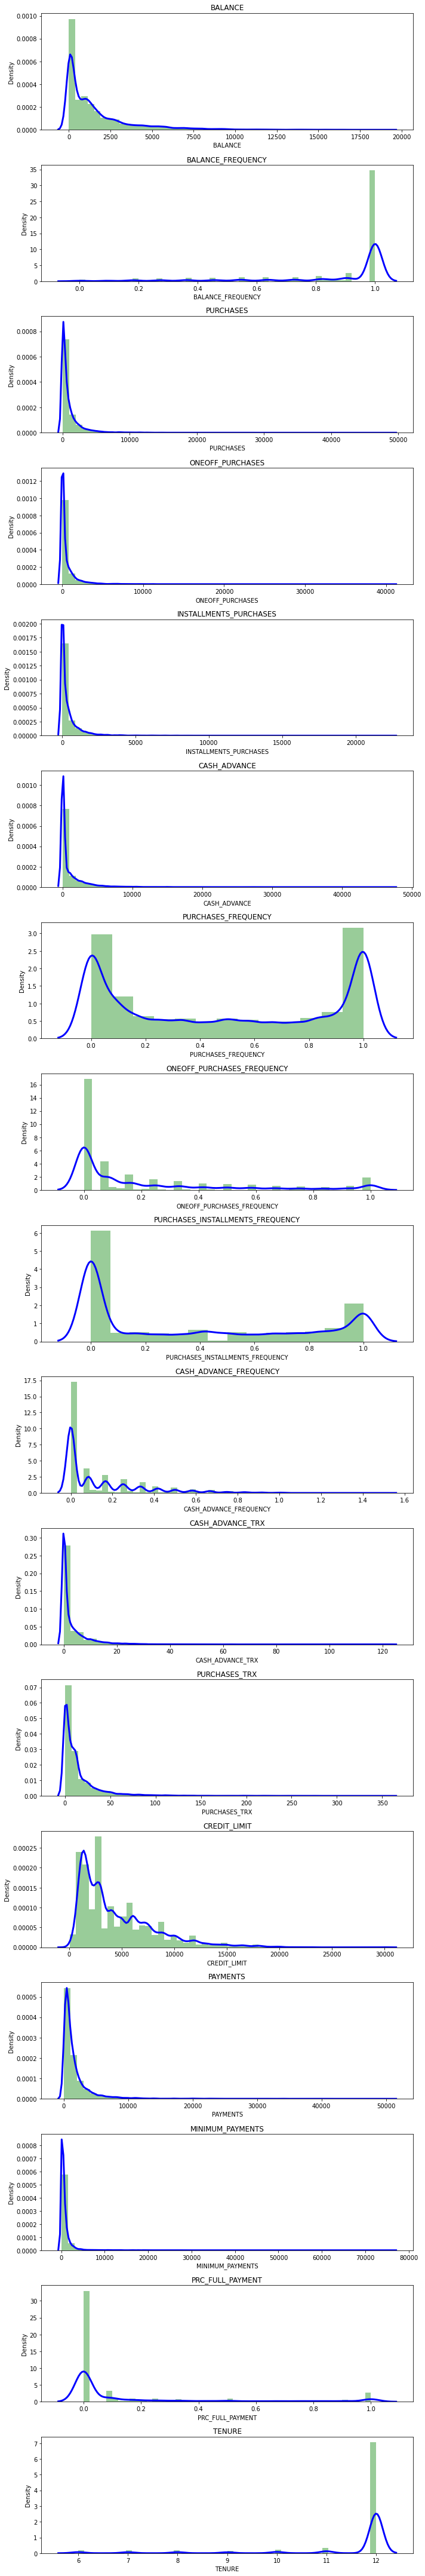

In [95]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw':0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

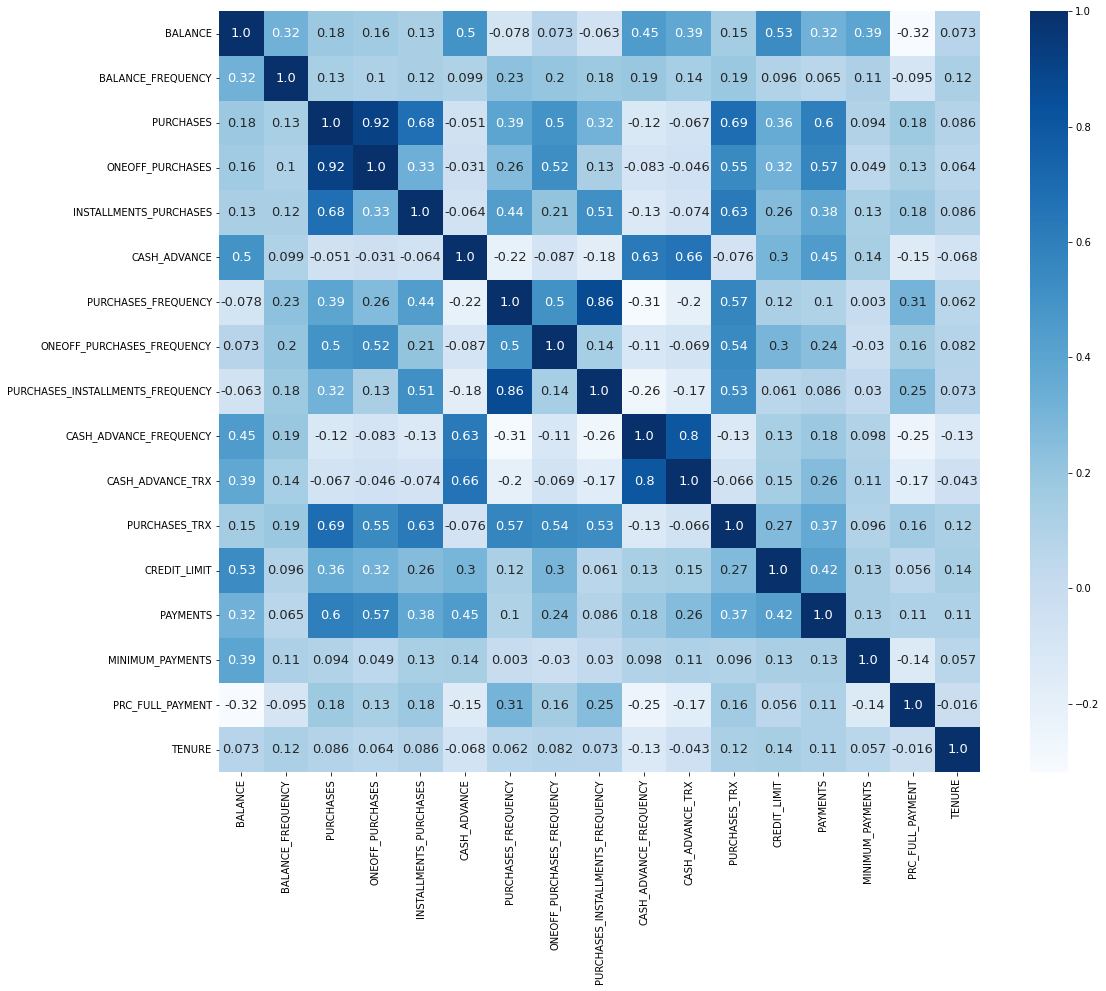

In [96]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),square=True,annot=True,cbar=True,annot_kws={'size':13},fmt='.2',cmap='Blues')
plt.show()

In [97]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [98]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [99]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_scaled)
pca_df=pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076450
1,-1.138296,2.506471
2,0.969683,-0.383527
3,-0.873629,0.043166
4,-1.599434,-0.688580
...,...,...
8945,-0.359630,-2.016142
8946,-0.564370,-1.639116
8947,-0.926204,-1.810782
8948,-2.336551,-0.657961


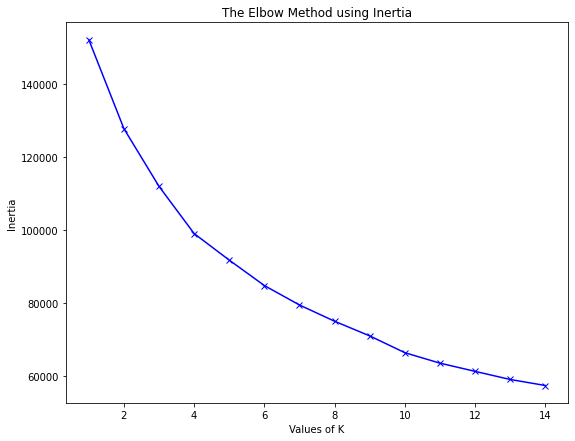

In [100]:
inertia=[]
range_val=range(1,15)
for i in range_val:
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit_predict(pd.DataFrame(df_scaled))
    inertia.append(kmean.inertia_)
plt.figure(figsize=(9,7))
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [101]:
kmeans_model=KMeans(n_clusters=4,init='k-means++')
kmeans_model.fit(df_scaled)
pca_df_kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

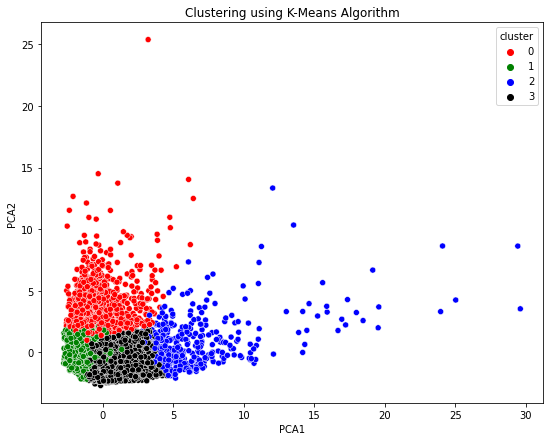

In [102]:
plt.figure(figsize=(9,7))
ax=sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title('Clustering using K-Means Algorithm')
plt.show()

In [103]:
cluster_centers=pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])

In [104]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
1,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595


In [105]:
cluster_df=pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [106]:
df0=cluster_df[cluster_df['Cluster']==0]
df1=cluster_df[cluster_df['Cluster']==1]
df2=cluster_df[cluster_df['Cluster']==2]
df3=cluster_df[cluster_df['Cluster']==3]

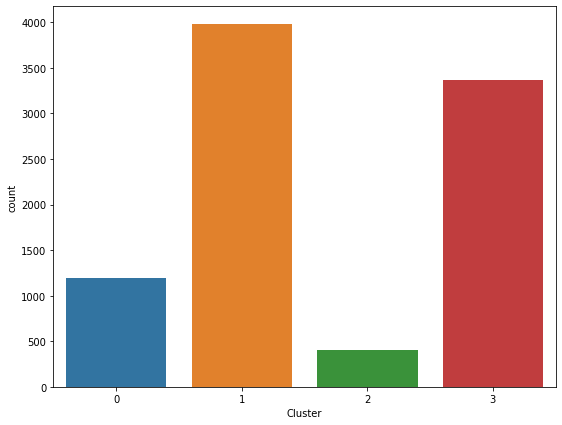

In [107]:
plt.figure(figsize=(9,7))
sns.countplot(data=cluster_df,x='Cluster')
plt.show()

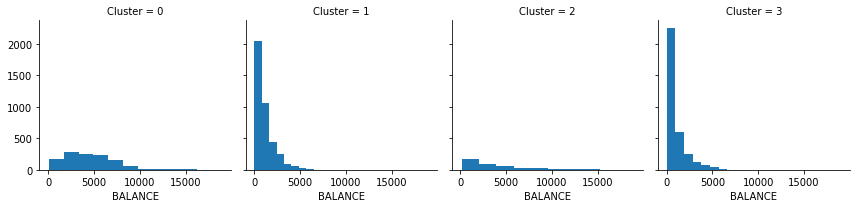

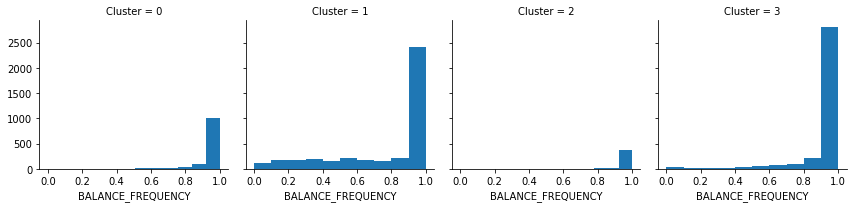

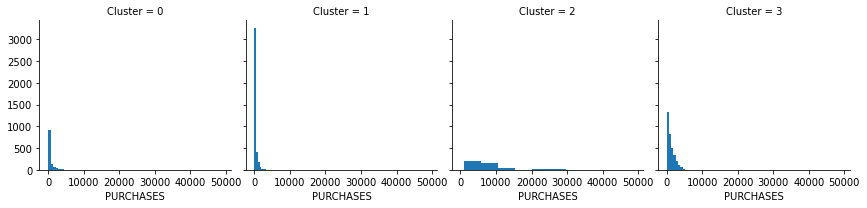

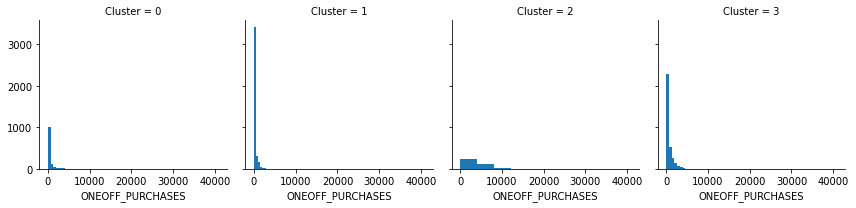

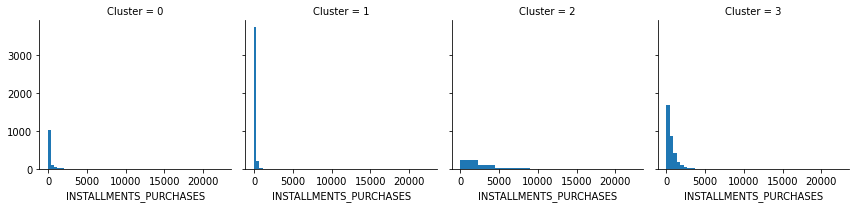

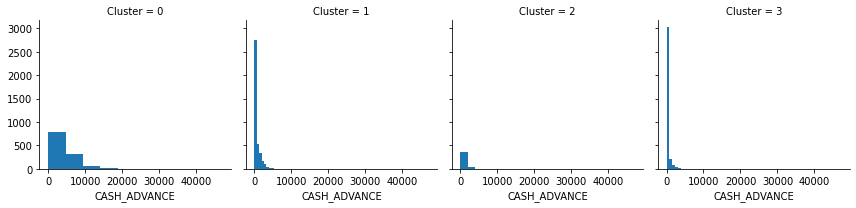

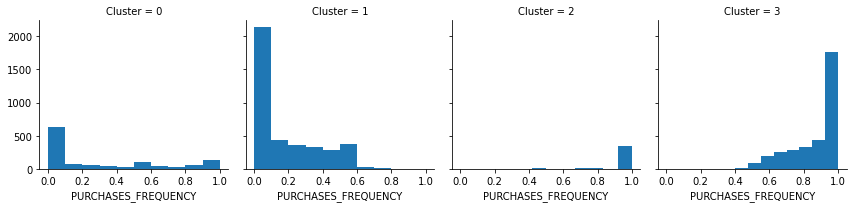

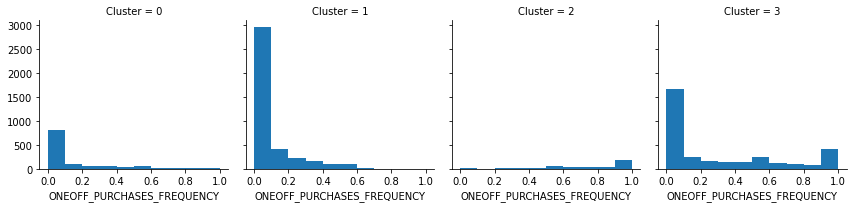

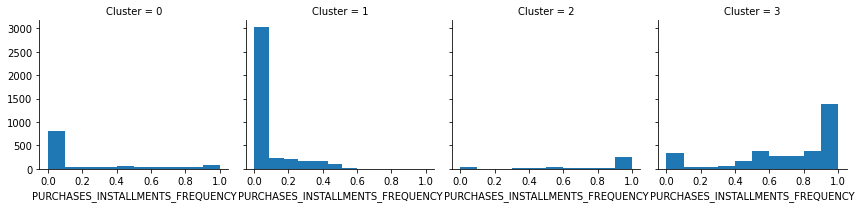

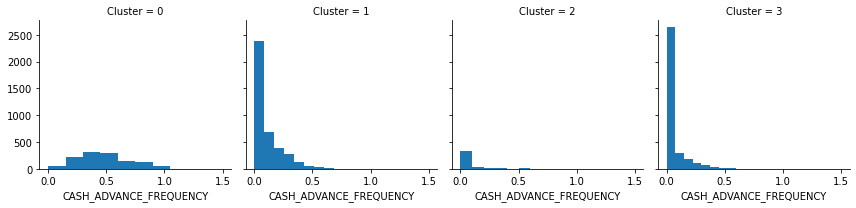

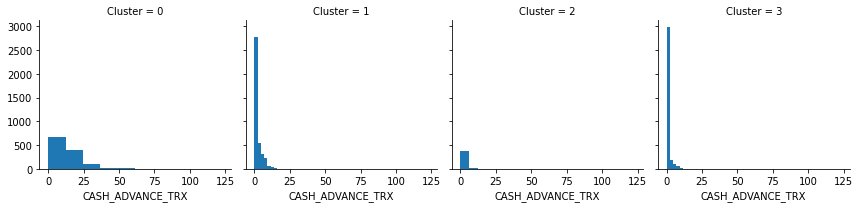

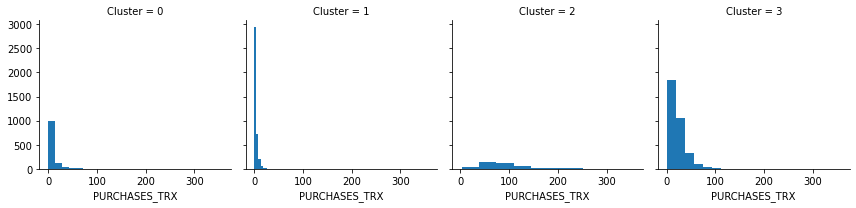

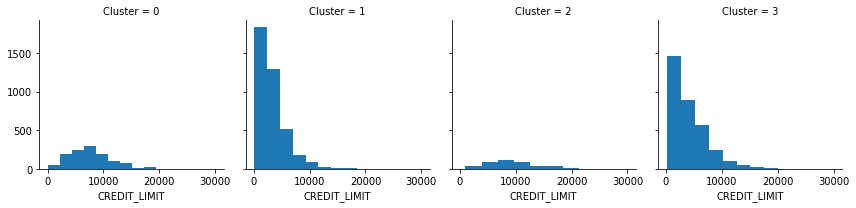

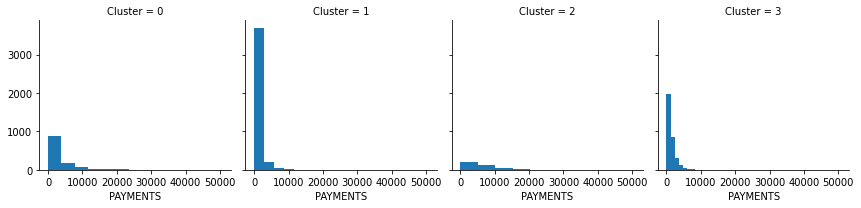

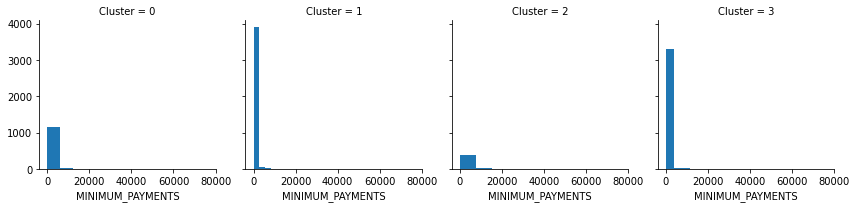

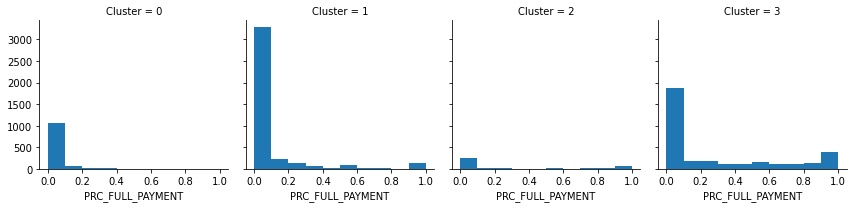

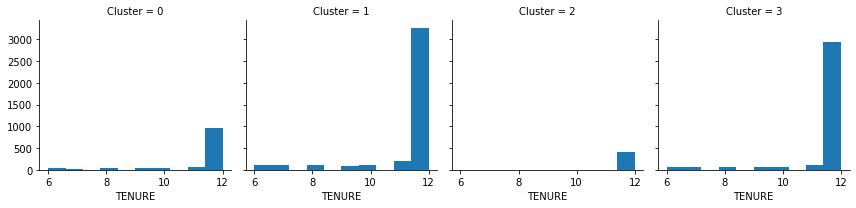

In [108]:
for c in cluster_df.drop(columns=['Cluster'],axis=1):
    b=sns.FacetGrid(data=cluster_df,col='Cluster')
    b.map(plt.hist,c)
    plt.show()

In [109]:
joblib.dump(kmeans_model,'kmeans_model.pkl')

['kmeans_model.pkl']

In [110]:
cluster_df.to_csv('Clustered_Customer_Data.csv')

In [111]:
X=cluster_df.drop(columns=['Cluster'],axis=1)
y=cluster_df['Cluster']

In [112]:
y.value_counts()

Cluster
1    3976
3    3367
0    1198
2     409
Name: count, dtype: int64

In [113]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [114]:
y_sm.value_counts()

Cluster
1    3976
2    3976
3    3367
0    1198
Name: count, dtype: int64

In [115]:
X_sm,y_sm=smote.fit_resample(X_sm,y_sm)

In [116]:
y_sm.value_counts()

Cluster
1    3976
0    3976
2    3976
3    3367
Name: count, dtype: int64

In [117]:
X_sm,y_sm=smote.fit_resample(X_sm,y_sm)

In [118]:
y_sm.value_counts()

Cluster
1    3976
0    3976
3    3976
2    3976
Name: count, dtype: int64

In [119]:
len(X_sm)

15904

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=101,stratify=y_sm,shuffle=True)

In [121]:
X_train.shape

(12723, 17)

In [122]:
X_test.shape

(3181, 17)

In [123]:
y_train.value_counts()

Cluster
2    3181
1    3181
0    3181
3    3180
Name: count, dtype: int64

In [124]:
y_test.value_counts()

Cluster
3    796
1    795
0    795
2    795
Name: count, dtype: int64

In [125]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [126]:
X_train_scaled

array([[-0.85241136, -0.75649636, -0.3210822 , ..., -0.36795529,
         1.45356066, -2.10457543],
       [-0.55679808,  0.41295051,  1.80458546, ..., -0.34036841,
         2.65662529,  0.34845964],
       [ 0.5047709 , -0.70981422,  0.18147474, ...,  0.04251898,
        -0.11395815,  0.34845964],
       ...,
       [-0.387652  ,  0.41295051, -0.55910331, ..., -0.27713697,
        -0.55890257,  0.34845964],
       [-0.77113086,  0.41295051, -0.55910331, ..., -0.34323024,
        -0.2793949 ,  0.34845964],
       [-0.82961136,  0.19366607,  0.01963954, ..., -0.3530946 ,
         1.26485072,  0.34845964]])

In [127]:
X_test_scaled

array([[-0.89305013,  0.07276262, -0.40423086, ..., -0.35960107,
         2.62484315, -1.28689707],
       [-0.90380297, -1.97909991, -0.49278333, ..., -0.3868292 ,
         0.27962378,  0.34845964],
       [-0.30360884, -0.11330111, -0.55910331, ..., -0.25573311,
        -0.13963939, -1.28689707],
       ...,
       [ 2.17397976,  0.41295051,  0.57543606, ...,  0.49217186,
        -0.55890257,  0.34845964],
       [-0.29606148,  0.41295051, -0.49339117, ..., -0.1929708 ,
        -0.55890257,  0.34845964],
       [-0.47229715,  0.31364981,  1.77571794, ..., -0.32462637,
         0.53683908,  0.34845964]])

In [128]:
X_train.std().mean()

1569.6233574944538

In [129]:
X_train_scaled.std().mean()

1.0

In [130]:
X_test_scaled.std().mean()

1.019538544601976

In [131]:
model=DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)
y_predict=model.predict(X_test_scaled)

In [132]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       795
           1       0.95      0.94      0.94       795
           2       0.99      0.98      0.99       795
           3       0.94      0.96      0.95       796

    accuracy                           0.96      3181
   macro avg       0.96      0.96      0.96      3181
weighted avg       0.96      0.96      0.96      3181



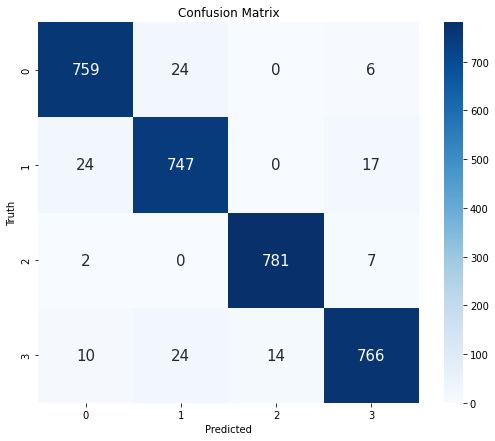

In [134]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_predict,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [135]:
filename='final_model.sav'
pickle.dump(model,open(filename,'wb'))

In [137]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.score(X_test_scaled,y_test)
print(result,'% Accuracy')

0.9597610814209369 % Accuracy
